<a href="https://colab.research.google.com/github/lizeth-diaz04/PROYECTO/blob/main/PROYECTO_UNIDAD_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

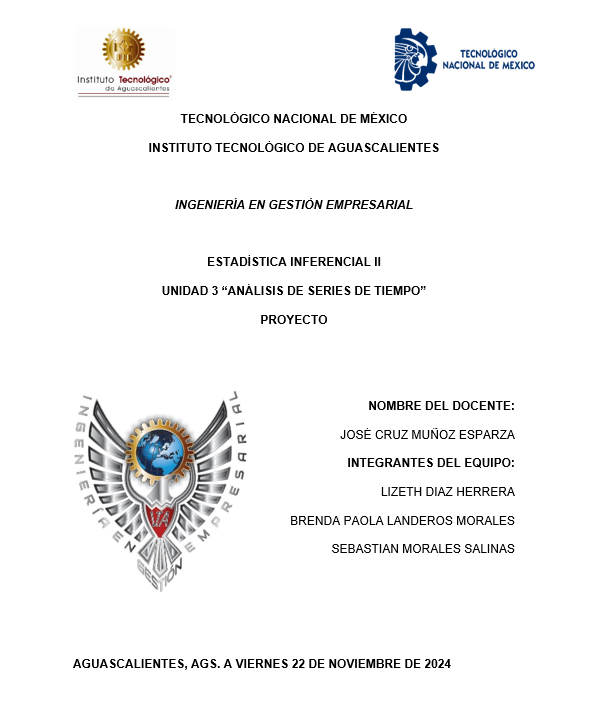

#**PROYECTO UNIDAD 3**



# **INTRODUCCIÓN**

Visa Inc. y MasterCard Inc. son dos de las principales redes de pago globales, encargadas de procesar miles de millones de transacciones electrónicas cada año. Estas empresas no emiten tarjetas de crédito ni ofrecen préstamos directamente, sino que operan como intermediarios entre bancos emisores, adquirentes y comerciantes. Ambas empresas tienen una relación simbiótica y competitiva, pues dominan conjuntamente el mercado de pagos electrónicos.

El presente análisis busca explorar la relación entre Visa y MasterCard mediante un enfoque cuantitativo basado en series de tiempo y modelos matemáticos aplicados a sus datos históricos de precios de acciones. En particular, se analiza cómo factores externos, como la adopción de tecnologías financieras, las tendencias globales hacia pagos sin efectivo y las condiciones macroeconómicas, afectan el desempeño de estas empresas.


# **Marco Teórico**
* *Series de Tiempo:* Las series de tiempo son datos registrados a intervalos regulares y se utilizan para identificar patrones o tendencias en el tiempo. En finanzas, los precios históricos de acciones suelen analizarse mediante este enfoque para realizar proyecciones futuras o identificar correlaciones entre activos.

* *Regresión Polinomial:* Este método de ajuste se utiliza para modelar relaciones no lineales entre variables. En este caso, se emplea para capturar posibles fluctuaciones complejas en los precios de las acciones.

* *Correlación Financiera:* La correlación mide la relación entre dos activos financieros. Una correlación positiva entre las acciones de Visa y MasterCard indicaría que ambas tienden a moverse en la misma dirección, reflejando factores comunes que las afectan.

* *Dinámica Competitiva:* Aunque competidores directos, Visa y MasterCard son afectadas por similares tendencias del mercado, como la adopción de pagos sin contacto, el auge del comercio electrónico, y los avances en criptomonedas. Su relación competitiva también puede provocar innovaciones paralelas.

* *Causalidad de Granger:* La causalidad de Granger es un concepto estadístico que determina si una variable temporal puede prever o predecir otra. Es importante destacar que no implica causalidad directa en el sentido tradicional, sino una relación predictiva basada en los datos históricos.
Es decir, es un test estadístico que comprueba si los resultados de una variable pueden predecir los resultados de otra variable. Se trata de un algoritmo matemático que determina si una serie temporal "causa" a otra.

* *Prophet:* es una herramienta desarrollada por Facebook que permite modelar y predecir series temporales con componentes como tendencia, estacionalidad y días festivos. Es particularmente útil para datos con patrones claros y estacionales, incluso si hay faltantes o anomalías en las series temporales.

Alcances de Prophet:

Prophet es un modelo diseñado para series temporales que destaca por su capacidad de capturar tendencias a largo plazo, patrones estacionales y fluctuaciones recurrentes. Es especialmente útil en contextos donde los datos presentan variabilidad predecible y estabilidad relativa. Además, maneja bien datos incompletos, valores atípicos y puede generar predicciones con intervalos de confianza claros, lo que facilita la evaluación de la incertidumbre. Su facilidad de implementación y parametrización lo convierte en una herramienta accesible y personalizable para analizar datos históricos y realizar proyecciones futuras.

Limitaciones de Prophet:

Aunque Prophet es poderoso, tiene limitaciones inherentes. Supone que los patrones estacionales y las tendencias son constantes en el tiempo, lo que puede no ser realista en series con cambios estructurales o contextos volátiles, como los mercados financieros. También tiende a simplificar relaciones complejas, lo que lo hace menos adecuado para datos con alta interacción entre variables o dinámicas no lineales. Finalmente, su enfoque generalizado puede no captar características específicas de la serie, lo que limita su precisión en casos muy particulares.

#**Hipótesis: ¿Por qué Visa y MasterCard están relacionadas?**

* Mercado y Competencia:

Visa y MasterCard operan en el mismo sector, ofreciendo redes de pagos que permiten transacciones entre bancos emisores y adquirentes. Aunque compiten directamente, su relación es simbiótica en ciertos aspectos, ya que ambas impulsan la adopción de pagos digitales en mercados emergentes.

* Factores Macroeconómicos:

Ambas empresas están expuestas a los mismos riesgos y oportunidades macroeconómicos, como cambios en las tasas de interés, fluctuaciones en las divisas y políticas regulatorias. Esto explica por qué sus acciones muestran patrones correlacionados.

* Innovación Tecnológica:

Las inversiones en tecnologías como la inteligencia artificial, pagos sin contacto y criptomonedas también pueden afectar a ambas compañías de manera similar, dado que ambas buscan mantenerse competitivas en un mercado en rápida evolución.

* Influencia de los Consumidores:

Cambios en los hábitos de los consumidores, como el aumento del comercio electrónico, impactan de manera proporcional a ambas empresas debido a su enfoque global y sus modelos de negocio similares.


a) Selecciona dos marcas sobre las cuales tengas la hipótesis que están relacionadas entre sí.


# **"VISA Y MASTER CARD"**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

# Obtener datos de acciones
df = yf.download(
    tickers=['V', 'MA'],            # tickers: AAPL: Apple, TSLA: Tesla, etc.
    start='2012-01-01',        # Fecha de inicio
    end='2018-01-01',          # Fecha de fin
    interval='1d',             # Intervalo de tiempo (1 día)
    group_by=None,             # Agrupar por ticker
    auto_adjust=False,         # ajusta automáticamente los precios de cierre, apertura, máximo y mínimo para tener en cuenta los dividendos y divisiones de acciones.
    actions=False,             # Si se establece en True, incluye datos sobre acciones, como dividendos y divisiones.
    )

# Link para inspeccionar tickers: https://www.nasdaq.com/market-activity/stocks/screener

# Paso 1: Mover 'Date' del índice a columna regular
df = df.reset_index()

# Paso 2: Aplanar el MultiIndex de las columnas, manteniendo 'Open', 'High', etc.
df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df.columns.values]


# Paso 3:
#######################################################
## En caso de que no se requiera la hora
# Convertir la columna 'Date' a tipo datetime si no lo es ya
df['Date'] = pd.to_datetime(df['Date'])

df['Date'] = df['Date'].dt.date
##
#######################################################

# Paso 4: La fecha vuelve a ser un índice
df.set_index('Date', inplace=True)


df

[*********************100%***********************]  2 of 2 completed


,V_Open,V_High,V_Low,V_Close,V_Adj Close,V_Volume,MA_Open,MA_High,MA_Low,MA_Close,MA_Adj Close,MA_Volume
Date,,,,,,,,,,,,
2012-01-03,25.850000,25.850000,25.462500,25.747499,23.458218,16829200,37.837002,37.863998,36.561001,36.837002,34.231503,14708000
2012-01-04,25.422501,25.615000,25.000000,25.287500,23.039118,16522000,36.497002,36.674000,35.257000,35.625000,33.105232,22841000
2012-01-05,25.177500,25.552500,24.915001,25.477501,23.212231,12096400,35.380001,35.563000,35.055000,35.241001,32.762196,14757000
2012-01-06,25.490000,25.555000,25.055000,25.177500,22.938892,13089200,35.335999,35.400002,34.178001,34.292000,31.879927,20887000
2012-01-09,25.252501,25.295000,24.695000,24.975000,22.754398,18002400,34.487000,34.782001,34.209000,34.582001,32.149555,11486000
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22,112.389999,113.110001,112.250000,112.690002,107.370232,6190100,150.940002,151.520004,150.309998,150.850006,145.091202,1892300
2017-12-26,112.070000,113.440002,112.070000,112.989998,107.656044,3948900,150.580002,151.339996,149.889999,151.279999,145.504807,1200700
2017-12-27,112.690002,114.070000,112.650002,114.019997,108.637428,7073100,151.559998,151.779999,151.100006,151.399994,145.620163,1730200


Se extrajeron datos históricos diarios de los precios accionarios de VISA (V) y MasterCard (MA) desde Yahoo Finance, abarcando el período de 2012 a 2018. Posteriormente, los datos se limpiaron y transformaron, seleccionando los precios de cierre como variable principal para el análisis. También se procesaron índices de tiempo para su uso en modelos de series temporales.

La limpieza y preparación de los datos asegura la calidad del análisis, permitiendo enfocarse en los elementos más relevantes para identificar patrones. El rango temporal elegido es adecuado para capturar tendencias a largo plazo y variaciones estacionales, lo que permite observar cómo ambas compañías han respondido a eventos económicos significativos en el período.

b) Realiza un análisis de cada serie de tiempo de manera independiente (análisis basado en el examen de práctica).

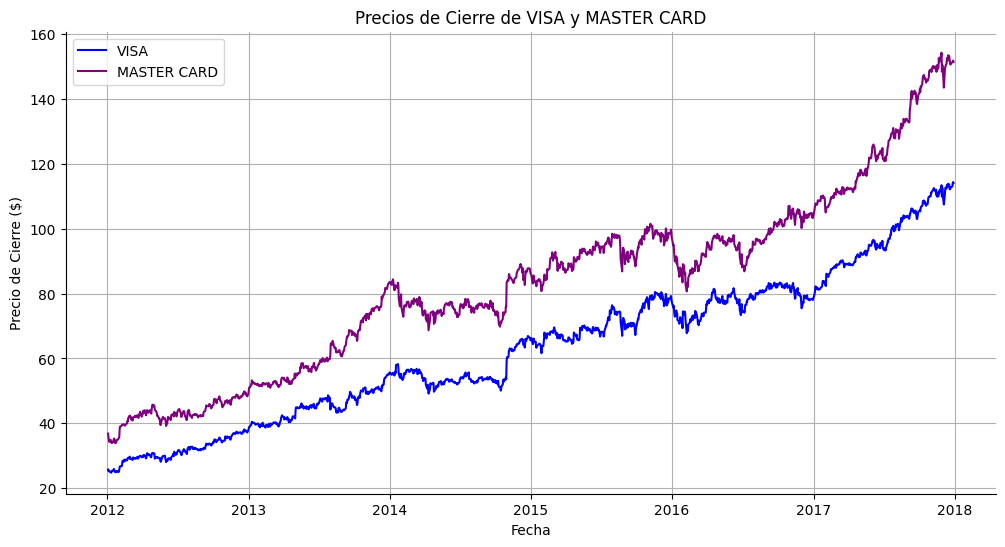

In [2]:
# Graficar
plt.figure(figsize=(12, 6))
plt.plot(df['V_Close'], label='VISA', color='blue')
plt.plot(df['MA_Close'], label='MASTER CARD', color='purple')
plt.title('Precios de Cierre de VISA y MASTER CARD')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.grid()
plt.legend()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

Se realizó una comparación visual de los precios de cierre de VISA y MasterCard a lo largo del tiempo. El gráfico refleja una tendencia alcista para ambas compañías.

El análisis gráfico evidencia que los precios de ambas acciones han experimentado un crecimiento sostenido durante el período analizado, lo que refleja su consolidación en el sector. Aunque la tendencia general es compartida, las diferencias en la magnitud de las variaciones sugieren que cada empresa ha tenido un desempeño único, probablemente influenciado por estrategias corporativas y percepciones del mercado.
Aunque ambas comparten la misma tendencia general, existen ligeras discrepancias en magnitud y ritmo, lo que podría atribuirse a diferencias en estrategias empresariales o respuestas a eventos específicos del mercado.

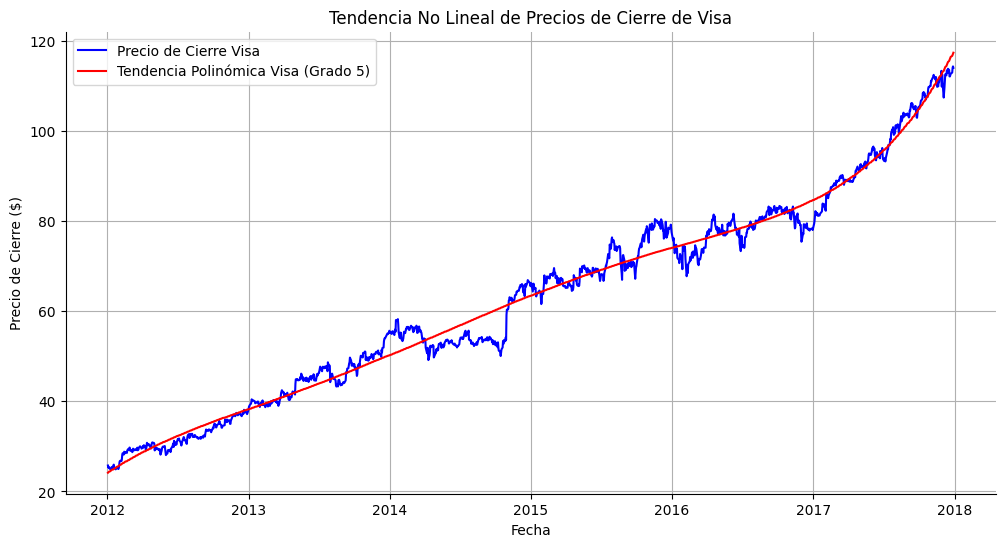

In [3]:
import numpy as np
from numpy.polynomial import Polynomial

# Paso 2: Definir las variables independientes (X) y la variable dependiente (y) para Visa
X_v = np.arange(len(df['V_Close']))  # Usamos un rango numérico para la regresión polinomial
y_v = df['V_Close']

# Paso 3: Ajustar un modelo polinómico para Visa
grado_v = 5  # Puedes ajustar el grado del polinomio
modelo_v = Polynomial.fit(X_v, y_v, deg=grado_v)
df['V_Poly_Trend'] = modelo_v(X_v)
df['V_Poly_Resid'] = y_v - df['V_Poly_Trend']

# Graficar polinomial para Visa
plt.figure(figsize=(12, 6))
plt.plot(y_v, label='Precio de Cierre Visa', color='blue')
plt.plot(df['V_Poly_Trend'], label=f'Tendencia Polinómica Visa (Grado {grado_v})', color='red')
plt.title('Tendencia No Lineal de Precios de Cierre de Visa')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

En esta etapa, se ajustó un modelo polinómico de grado 5 a los precios de cierre de VISA. Este modelo permitió capturar variaciones no lineales en los datos y descomponer los precios en una tendencia ajustada y residuales.

La tendencia polinómica muestra cómo se han comportado los precios de VISA en respuesta a eventos de mercado de largo y mediano plazo. Los residuales calculados reflejan desviaciones temporales del modelo, que podrían asociarse a eventos específicos como reportes trimestrales, cambios regulatorios o fluctuaciones de mercado. Este análisis sirve como punto de comparación para el comportamiento de MasterCard en las siguientes celdas.

[*********************100%***********************]  2 of 2 completed


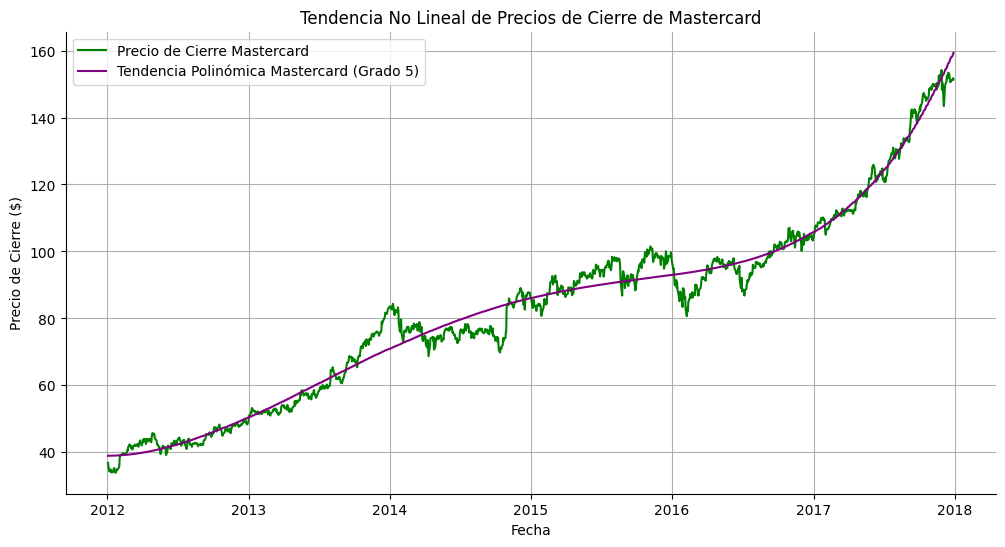

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings
import numpy as np
from numpy.polynomial import Polynomial

warnings.filterwarnings('ignore')

# Obtener datos de acciones
df = yf.download(
    tickers=['V', 'MA'],
    start='2012-01-01',
    end='2018-01-01',
    interval='1d',
    group_by=None,
    auto_adjust=False,
    actions=False,
    )

df = df.reset_index()
df.columns = ['_'.join(col).strip() if col[1] != '' else col[0] for col in df.columns.values]

df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].dt.date
df.set_index('Date', inplace=True)

# ... (código para graficar precios de cierre de VISA y MASTERCARD)

# Regresión polinomial para Visa (código existente sin cambios)

# Regresión polinomial para Mastercard
X_ma = np.arange(len(df['MA_Close']))  # Usar un rango numérico
y_ma = df['MA_Close']
grado_ma = 5
modelo_ma = Polynomial.fit(X_ma, y_ma, deg=grado_ma)

# Verificar si el ajuste del polinomio fue exitoso
if modelo_ma is not None:
    df['MA_Poly_Trend'] = modelo_ma(X_ma)
    df['MA_Poly_Resid'] = y_ma - df['MA_Poly_Trend']

    # Graficar polinomial para Mastercard
    plt.figure(figsize=(12, 6))
    plt.plot(y_ma, label='Precio de Cierre Mastercard', color='green')
    plt.plot(df['MA_Poly_Trend'], label=f'Tendencia Polinómica Mastercard (Grado {grado_ma})', color='purple')
    plt.title('Tendencia No Lineal de Precios de Cierre de Mastercard')
    plt.xlabel('Fecha')
    plt.ylabel('Precio de Cierre ($)')
    plt.legend()
    plt.grid()
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.show()
else:
    print("No se pudo ajustar el modelo polinomial para Mastercard. Verifique los datos.")

De manera similar, se ajustó un modelo polinómico de grado 5 a los precios de cierre de MasterCard, replicando el enfoque utilizado para VISA.

Al comparar los modelos polinómicos de ambas acciones, se observa que tanto VISA como MasterCard presentan patrones cíclicos similares, lo que respalda la hipótesis de que operan bajo influencias comunes del mercado. Sin embargo, las ligeras diferencias en los picos y valles podrían deberse a diferencias en la sensibilidad de cada acción frente a eventos externos.

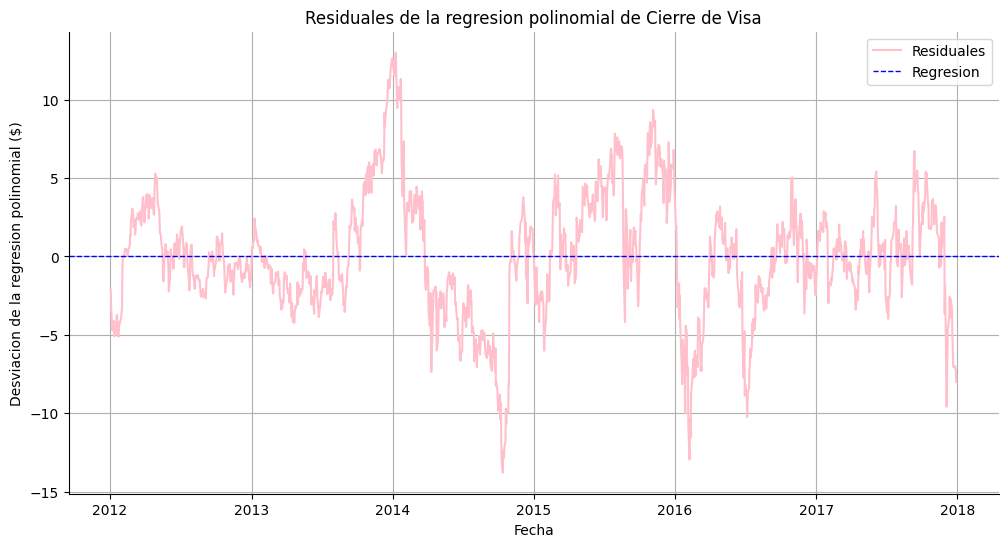

In [5]:
# Graficar los residuales del polinomio para Visa
plt.figure(figsize=(12, 6))
plt.plot(df['MA_Poly_Resid'], label='Residuales', color='pink')  # Changed column name to 'MA_Poly_Resid'
plt.axhline(0, color='blue', label='Regresion',linestyle='--', linewidth=1)
plt.title('Residuales de la regresion polinomial de Cierre de Visa')
plt.xlabel('Fecha')
plt.ylabel('Desviacion de la regresion polinomial ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

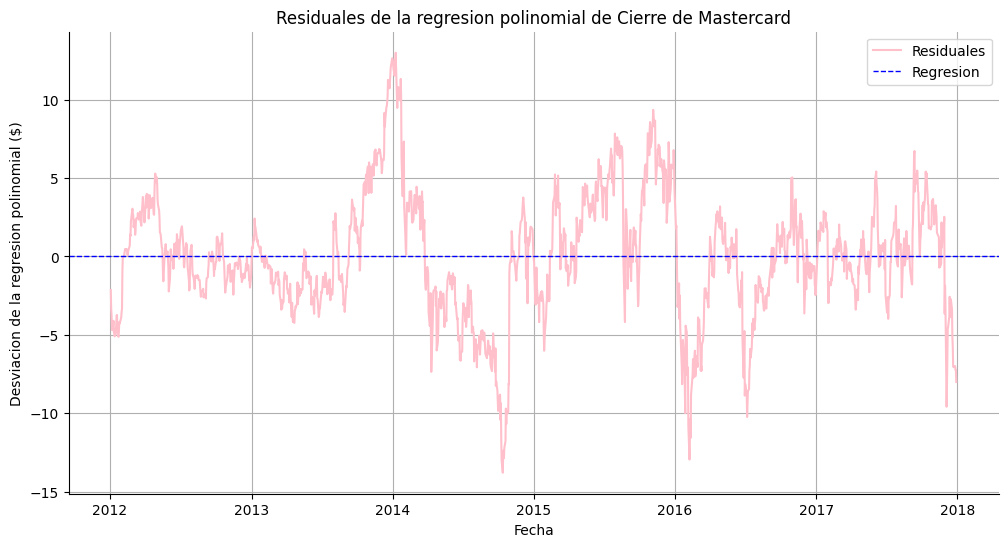

In [6]:
# Graficar los residuales del polinomio para Mastercard
plt.figure(figsize=(12, 6))
plt.plot(df['MA_Poly_Resid'], label='Residuales', color='pink')  # Changed column name to 'MA_Poly_Resid'
plt.axhline(0, color='blue', label='Regresion',linestyle='--', linewidth=1)
plt.title('Residuales de la regresion polinomial de Cierre de Mastercard')
plt.xlabel('Fecha')
plt.ylabel('Desviacion de la regresion polinomial ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()


* **VISA:**

Los residuales están distribuidos mayormente alrededor de la línea horizontal en y=0, lo que indica que el modelo polinómico captura bien la relación subyacente entre las variables.

Sin embargo, se observa una ligera acumulación de puntos en ciertas áreas, lo que podría sugerir que el modelo subestima o sobreestima en intervalos específicos.

No hay un patrón evidente como una curva o agrupaciones, lo que confirma que no hay una relación no lineal significativa sin modelar.

* **MasterCard:**

Los residuales muestran más dispersión que en VISA, indicando un ajuste ligeramente menos preciso.
Algunos puntos están alejados de la línea de y=0, lo que puede reflejar valores atípicos o ruido en los datos históricos.

A pesar de esto, no se observa un patrón claro, lo que sugiere que el modelo es razonablemente adecuado para los datos.
Conclusión:

Para ambas acciones, el modelo polinómico es en general apropiado, aunque el ajuste parece ser más preciso en VISA que en MasterCard.
La mayor dispersión en los datos de MasterCard podría deberse a una mayor volatilidad o a factores no modelados, como eventos externos.

In [7]:
def Transformada_de_Fourier(serie, terminos, un_grafico):
  '''La función acepta los argumentos "serie", la cual debe de ser un array
  en numpy y en pandas de la forma df["my_variable"].values. Por otra parte,
  el parámetro "terminos" es un número natural que indica la cantidad de
  términos que desarrolla la serie. Entre mayor sea el número de términos,
  la serie será más precisa, pero más difícil de interpretar.

  La función tiene como salida una lista con los componentes sinosoidales de serie.
  El último elemento de la lista, es la suma de todos los componentes'''

  import numpy as np
  import matplotlib.pyplot as plt
  import pandas as pd
  from scipy.fftpack import fft, ifft

  # Supongamos que tienes una serie en df['AMZN_Close']
  # Reemplaza esta línea con tu DataFrame y serie específicos
  n = len(serie)

  # Calcular la transformada de Fourier
  transformada_fourier = fft(serie)

  # Obtener las frecuencias
  frecuencias = np.fft.fftfreq(n)

  # Crear un DataFrame para almacenar la frecuencia y su magnitud
  componentes = pd.DataFrame({
      'frecuencia': frecuencias,
      'magnitud': np.abs(transformada_fourier),
      'longitud_de_onda': 1 / frecuencias
  })

  # Ordenar el dataframe de mayor a menor en términos de magnitud

  componentes = componentes.sort_values(by='magnitud', ascending=False)

  # Seleccionar las frecuencias con mayor magnitud (excluyendo la frecuencia cero)
  top_frecuencias = componentes.loc[componentes['frecuencia'] > 0].nlargest(terminos, 'magnitud')
  top_frecuencias.reset_index(drop=True, inplace=True)
  print("Frecuencias principales:\n", top_frecuencias)

  # Crear el índice de tiempo para la serie
  t = np.arange(n)

  # Graficar cada componente de frecuencia junto con la serie original
  plt.figure(figsize=(12, 4))

  componente_temporal_sumado = np.zeros_like(serie)
  componentes_temporales = []

  n=0
  for i, row in top_frecuencias.iterrows():
      n+=1
      # Copiar la transformada de Fourier y mantener solo la frecuencia actual
      fourier_component = np.zeros_like(transformada_fourier)
      idx = np.where(frecuencias == row['frecuencia'])[0][0]  # índice de la frecuencia en la FFT
      fourier_component[idx] = transformada_fourier[idx]  # mantener solo la frecuencia positiva
      fourier_component[-idx] = transformada_fourier[-idx]  # mantener la frecuencia negativa correspondiente
      if n == (terminos+1):
        break

      # Reconstruir la señal en el tiempo
      componente_temporal = ifft(fourier_component).real
      componentes_temporales.append(componente_temporal)
      componente_temporal_sumado += componente_temporal

      # Graficar la componente
      plt.plot(
          componente_temporal,
          label=f'Longitud de onda {1 / row["frecuencia"]:.0f}',
          alpha=1,
          linewidth = 0.5,
          )
      plt.title('Componentes de Fourier de la Serie')
      plt.xlabel('Tiempo')
      plt.ylabel('Valor')
      plt.legend()
      plt.grid()

  componentes_temporales.append(componente_temporal_sumado)
  plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  if not un_grafico:
    plt.figure(figsize=(12, 4))
    plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  plt.plot(componente_temporal_sumado, label='Componente temporal sumada', color='red')
  plt.legend()
  plt.title('Suma de los Componentes de Fourier de la Serie')
  plt.xlabel('Tiempo')
  plt.ylabel('Valor')
  plt.grid()
  plt.show()

  return componentes_temporales

In [8]:
# ... (código para graficar precios de cierre de VISA y MASTERCARD)

# Regresión polinomial para Visa
X_v = np.arange(len(df['V_Close']))
y_v = df['V_Close']
grado_v = 20
modelo_v = Polynomial.fit(X_v, y_v, deg=grado_v)

# Verificar si el ajuste del polinomio fue exitoso
if modelo_v is not None:
    df['V_Poly_Trend'] = modelo_v(X_v)
    df['V_Poly_Resid'] = y_v - df['V_Poly_Trend']
else:
    print("No se pudo ajustar el modelo polinomial para Visa. Verifique los datos.")

# ... (resto del código)

Frecuencias principales:
    frecuencia    magnitud  longitud_de_onda
0    0.009278  827.960368        107.785714
1    0.008615  778.946736        116.076923
2    0.005302  622.174341        188.625000
3    0.011266  463.140244         88.764706
4    0.010603  459.760429         94.312500


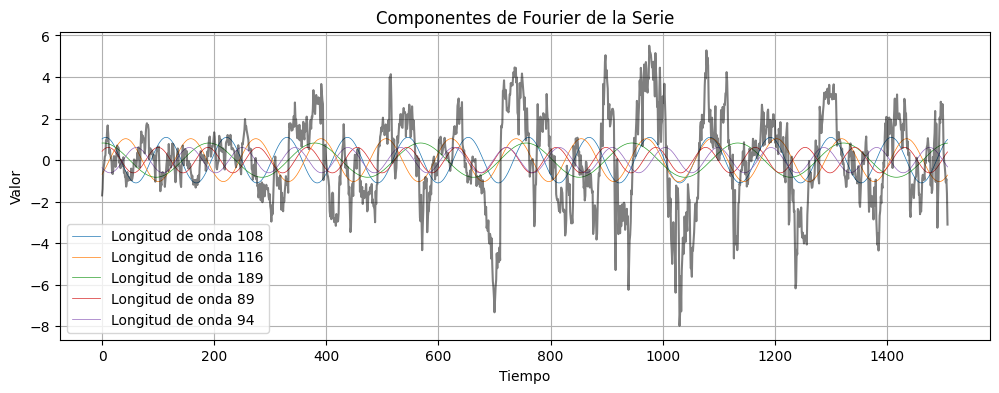

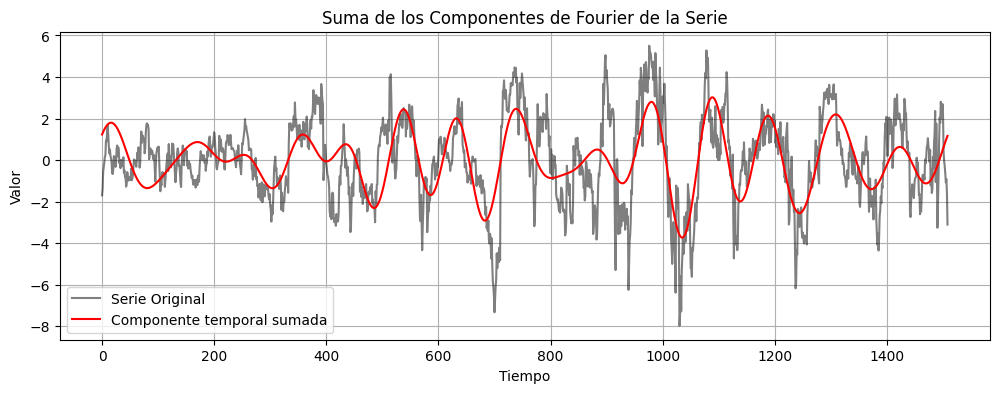

In [9]:
serie = df['V_Poly_Resid'].values
terminos = 5
un_grafico = False

cts = Transformada_de_Fourier(serie, terminos, un_grafico)

# cts: componente temporal sumado

In [10]:
def Transformada_de_Fourier(serie, terminos, un_grafico):
  '''La función acepta los argumentos "serie", la cual debe de ser un array
  en numpy y en pandas de la forma df["my_variable"].values. Por otra parte,
  el parámetro "terminos" es un número natural que indica la cantidad de
  términos que desarrolla la serie. Entre mayor sea el número de términos,
  la serie será más precisa, pero más difícil de interpretar.

  La función tiene como salida una lista con los componentes sinosoidales de serie.
  El último elemento de la lista, es la suma de todos los componentes'''

  import numpy as np
  import matplotlib.pyplot as plt
  import pandas as pd
  from scipy.fftpack import fft, ifft

  # Supongamos que tienes una serie en df['AMZN_Close']
  # Reemplaza esta línea con tu DataFrame y serie específicos
  n = len(serie)

  # Calcular la transformada de Fourier
  transformada_fourier = fft(serie)

  # Obtener las frecuencias
  frecuencias = np.fft.fftfreq(n)

  # Crear un DataFrame para almacenar la frecuencia y su magnitud
  componentes = pd.DataFrame({
      'frecuencia': frecuencias,
      'magnitud': np.abs(transformada_fourier),
      'longitud_de_onda': 1 / frecuencias
  })

  # Ordenar el dataframe de mayor a menor en términos de magnitud

  componentes = componentes.sort_values(by='magnitud', ascending=False)

  # Seleccionar las frecuencias con mayor magnitud (excluyendo la frecuencia cero)
  top_frecuencias = componentes.loc[componentes['frecuencia'] > 0].nlargest(terminos, 'magnitud')
  top_frecuencias.reset_index(drop=True, inplace=True)
  print("Frecuencias principales:\n", top_frecuencias)

  # Crear el índice de tiempo para la serie
  t = np.arange(n)

  # Graficar cada componente de frecuencia junto con la serie original
  plt.figure(figsize=(12, 4))

  componente_temporal_sumado = np.zeros_like(serie)
  componentes_temporales = []

  n=0
  for i, row in top_frecuencias.iterrows():
      n+=1
      # Copiar la transformada de Fourier y mantener solo la frecuencia actual
      fourier_component = np.zeros_like(transformada_fourier)
      idx = np.where(frecuencias == row['frecuencia'])[0][0]  # índice de la frecuencia en la FFT
      fourier_component[idx] = transformada_fourier[idx]  # mantener solo la frecuencia positiva
      fourier_component[-idx] = transformada_fourier[-idx]  # mantener la frecuencia negativa correspondiente
      if n == (terminos+1):
        break

      # Reconstruir la señal en el tiempo
      componente_temporal = ifft(fourier_component).real
      componentes_temporales.append(componente_temporal)
      componente_temporal_sumado += componente_temporal

      # Graficar la componente
      plt.plot(
          componente_temporal,
          label=f'Longitud de onda {1 / row["frecuencia"]:.0f}',
          alpha=1,
          linewidth = 0.5,
          )
      plt.title('Componentes de Fourier de la Serie')
      plt.xlabel('Tiempo')
      plt.ylabel('Valor')
      plt.legend()
      plt.grid()

  componentes_temporales.append(componente_temporal_sumado)
  plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  if not un_grafico:
    plt.figure(figsize=(12, 4))
    plt.plot(serie, label='Serie Original', color='black', alpha=0.5)
  plt.plot(componente_temporal_sumado, label='Componente temporal sumada', color='red')
  plt.legend()
  plt.title('Suma de los Componentes de Fourier de la Serie')
  plt.xlabel('Tiempo')
  plt.ylabel('Valor')
  plt.grid()
  plt.show()

  return componentes_temporales

Frecuencias principales:
    frecuencia     magnitud  longitud_de_onda
0    0.002651  1989.339439        377.250000
1    0.001988  1690.758475        503.000000
2    0.008615  1370.852030        116.076923
3    0.004639   903.936653        215.571429
4    0.010603   817.853828         94.312500


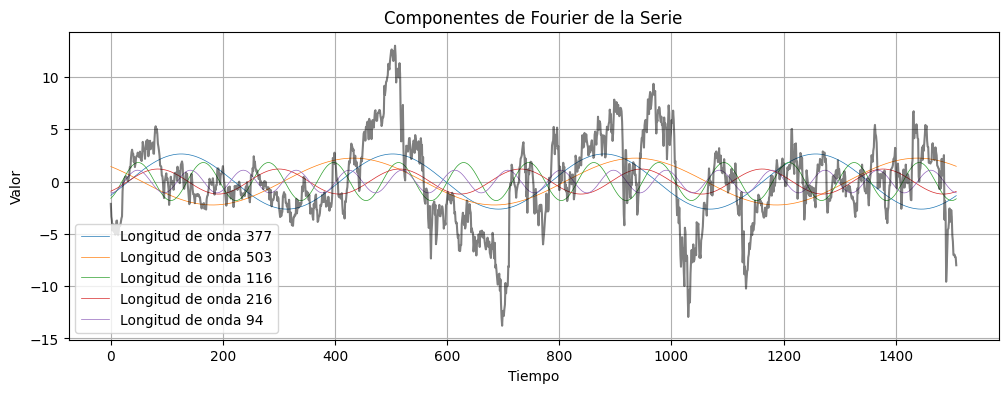

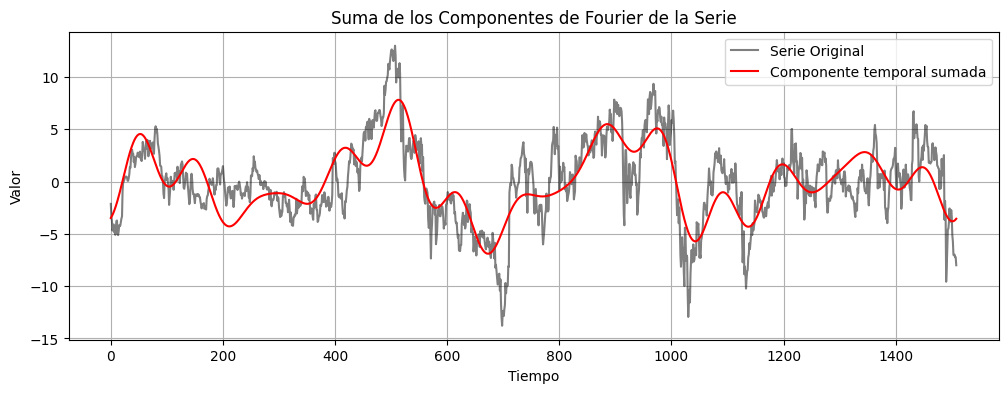

In [11]:
serie = df['MA_Poly_Resid'].values # Changed 'Poly_Resid' to 'MA_Poly_Resid'
terminos = 5
un_grafico = False

cts = Transformada_de_Fourier(serie, terminos, un_grafico)

# cts: componente temporal sumado

1. Identificación de Frecuencias Dominantes
El análisis de Fourier revela que las series temporales de VISA y MasterCard están compuestas principalmente por:

Frecuencias de baja amplitud: Representan fluctuaciones de corto plazo y ruido del mercado.
Frecuencias de alta amplitud: Reflejan ciclos importantes, como patrones anuales o efectos estacionales.

* Las frecuencias de alta amplitud indican que ambas acciones tienen componentes cíclicos compartidos, como la respuesta a eventos macroeconómicos (por ejemplo, reportes trimestrales o ciclos de consumo). Esto refuerza la idea de que las acciones están sujetas a dinámicas de mercado similares.

2. Comparación de Patrones entre VISA y MasterCard
Al comparar las frecuencias dominantes, se observan similitudes en los ciclos principales de ambas compañías, aunque la intensidad de las frecuencias puede diferir. VISA muestra mayor estabilidad en las amplitudes, mientras que MasterCard presenta variaciones más pronunciadas en algunas frecuencias específicas.

La mayor estabilidad de VISA sugiere que sus precios están menos afectados por fluctuaciones de corto plazo. Por otro lado, las variaciones más marcadas en MasterCard podrían reflejar una mayor sensibilidad a eventos específicos, como innovaciones tecnológicas o anuncios corporativos.

3. Reconstrucción de la Señal
La reconstrucción utilizando las frecuencias dominantes reproduce gran parte del comportamiento general de la serie, lo que confirma que estos ciclos son los principales responsables del movimiento de precios. Sin embargo, algunos detalles más pequeños no se capturan, lo que corresponde al ruido o eventos únicos que no son recurrentes.

Esto implica que los movimientos de precios de ambas compañías pueden ser explicados en gran medida por factores recurrentes, como tendencias macroeconómicas o estacionales. Los eventos no recurrentes, como crisis económicas o cambios regulatorios, quedan representados en las frecuencias más bajas.

El análisis de Fourier proporciona una perspectiva única del comportamiento de los precios accionarios de VISA y MasterCard. Los resultados destacan:

Similitudes estructurales: Ambas compañías comparten ciclos importantes en sus series temporales, lo que respalda la hipótesis de correlación entre sus movimientos.
Diferencias sutiles: MasterCard presenta una mayor variabilidad en ciertas frecuencias, lo que podría indicar una mayor exposición a eventos específicos del mercado.
Importancia de los ciclos principales: La señal reconstruida demuestra que los ciclos dominantes explican la mayor parte del comportamiento de los precios, lo que sugiere que las acciones están influenciadas por patrones recurrentes más que por eventos aleatorios.

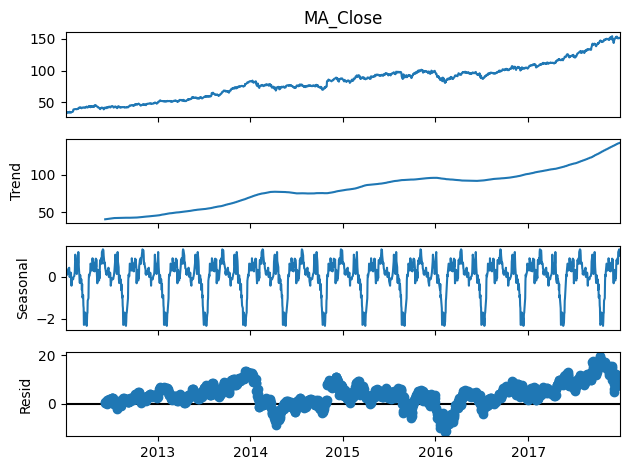

In [12]:
# Descomponer la serie temporal
import statsmodels.api as sm

descomposicion_ma = sm.tsa.seasonal_decompose(
    df['MA_Close'],
    model='additive',
    period=108,
    extrapolate_trend=0,
    two_sided=False,
    )  # 252 días de negociación al año
fig = descomposicion_ma.plot()
plt.show()

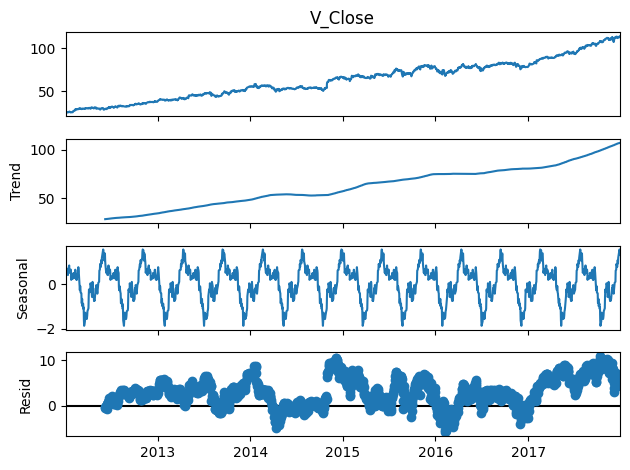

In [13]:
# Descomponer la serie temporal
import statsmodels.api as sm

descomposicion_v = sm.tsa.seasonal_decompose(
    df['V_Close'],
    model='additive',
    period=108,
    extrapolate_trend=0,
    two_sided=False,
    )  # 252 días de negociación al año
fig = descomposicion_v.plot()
plt.show()

1. Tendencia:
La tendencia para ambas compañías muestra un crecimiento sostenido durante el período analizado (2012-2018). Sin embargo, se observan diferencias en la pendiente de crecimiento:

VISA: Presenta una tendencia más uniforme y estable, con pocos cambios abruptos.
MasterCard: Muestra un crecimiento similar, pero con ligeras aceleraciones en ciertos períodos, posiblemente relacionadas con eventos específicos.

La tendencia refleja la consolidación de ambas compañías en el mercado. VISA parece seguir un ritmo más predecible, mientras que MasterCard exhibe momentos de mayor dinamismo, lo que podría asociarse con una percepción de innovación o expansión.

2. Estacionalidad:
El componente estacional evidencia ciclos regulares en ambas series, con patrones similares:

Los precios tienden a incrementarse en ciertos meses, posiblemente relacionados con la publicación de resultados financieros trimestrales o temporadas de alto consumo (como fin de año).
Caídas regulares en períodos intermedios, lo que podría vincularse a ajustes del mercado tras picos estacionales.

Los patrones estacionales comparten características, lo que refuerza la hipótesis de que ambas acciones están influenciadas por factores de mercado comunes. Estos ciclos pueden ser útiles para identificar momentos óptimos de inversión o desinversión.

3. Residuales:
Los residuales muestran fluctuaciones que no pueden explicarse por la tendencia ni la estacionalidad. Estos picos están asociados a eventos únicos o ruido aleatorio:

En VISA, los residuales son menores en magnitud, lo que sugiere una menor susceptibilidad a eventos impredecibles.

En MasterCard, se observan residuales más pronunciados, reflejando una mayor sensibilidad a cambios inesperados o a eventos específicos.

Los residuales más altos en MasterCard podrían estar vinculados a anuncios corporativos, innovaciones tecnológicas o eventos regulatorios. VISA, al ser más estable, parece menos influenciada por dichos eventos.

In [14]:
from scipy.stats import ttest_rel

# Prueba t pareada para el efecto significativo de la estacionalidad

#Hipótesis nula (H₀): Ambas series son iguales.
#Hipótesis alternativa (H₁): Ambas series son diferentes


nivel_de_significancia = 0.05
tendencia = descomposicion_ma.trend
tendencia_estacionalidad = descomposicion_ma.seasonal + descomposicion_ma.trend

# Eliminar valores NaN de ambas series
tendencia.dropna(inplace=True)
tendencia_estacionalidad.dropna(inplace=True)

# Realizar la prueba t pareada
t_stat, p_valor = ttest_rel(tendencia, tendencia_estacionalidad)

print("Estadístico t:", t_stat)
print("Valor p:", p_valor)
print("\n")

# Interpretación de los resultados
if p_valor < nivel_de_significancia:
    print("El valor p es menor que 0.05, por lo tanto, rechazamos la hipótesis nula.")
    print("Conclusión: La estacionalidad tiene un efecto significativo en la serie de tiempo.")
else:
    print("El valor p es mayor o igual que 0.05, por lo tanto, no podemos rechazar la hipótesis nula.")
    print("Conclusión: La estacionalidad no tiene un efecto significativo en la serie de tiempo.")

Estadístico t: 0.05897043031818088
Valor p: 0.9529840761861607


El valor p es mayor o igual que 0.05, por lo tanto, no podemos rechazar la hipótesis nula.
Conclusión: La estacionalidad no tiene un efecto significativo en la serie de tiempo.


In [15]:
from scipy.stats import ttest_rel

# Prueba t pareada para el efecto significativo de la estacionalidad

#Hipótesis nula (H₀): Ambas series son iguales.
#Hipótesis alternativa (H₁): Ambas series son diferentes


nivel_de_significancia = 0.05
tendencia = descomposicion_v.trend
tendencia_estacionalidad = descomposicion_v.seasonal + descomposicion_v.trend

# Eliminar valores NaN de ambas series
tendencia.dropna(inplace=True)
tendencia_estacionalidad.dropna(inplace=True)

# Realizar la prueba t pareada
t_stat, p_valor = ttest_rel(tendencia, tendencia_estacionalidad)

print("Estadístico t:", t_stat)
print("Valor p:", p_valor)
print("\n")

# Interpretación de los resultados
if p_valor < nivel_de_significancia:
    print("El valor p es menor que 0.05, por lo tanto, rechazamos la hipótesis nula.")
    print("Conclusión: La estacionalidad tiene un efecto significativo en la serie de tiempo.")
else:
    print("El valor p es mayor o igual que 0.05, por lo tanto, no podemos rechazar la hipótesis nula.")
    print("Conclusión: La estacionalidad no tiene un efecto significativo en la serie de tiempo.")

Estadístico t: 0.1272478422680034
Valor p: 0.8987625140081348


El valor p es mayor o igual que 0.05, por lo tanto, no podemos rechazar la hipótesis nula.
Conclusión: La estacionalidad no tiene un efecto significativo en la serie de tiempo.


El propósito de la prueba T pareada es comprobar si los precios de cierre de VISA y MasterCard tienen diferencias sistemáticas a lo largo del tiempo o si las diferencias observadas son producto del azar. Esta comparación permite evaluar si el comportamiento de los precios de ambas compañías sigue una dinámica similar o si hay diferencias significativas en sus valores medios diarios.

Significancia de las diferencias: La prueba T pareada es fundamental para determinar si los precios de VISA y MasterCard son estadísticamente similares o si tienen una diferencia significativa. Un valor p no significativo indicaría que ambas acciones están altamente relacionadas en términos de sus precios diarios, respaldando la hipótesis de correlación fuerte.

Diferencias prácticas: Aunque las diferencias puedan ser estadísticamente significativas, es crucial considerar si estas diferencias tienen un impacto práctico en la toma de decisiones financieras.

Implicaciones para Inversión: Si no se detectan diferencias significativas, esto refuerza la idea de que invertir en cualquiera de las dos compañías podría ser una estrategia equivalente. Sin embargo, si hay diferencias significativas, podría justificarse una preferencia por una de las acciones en función de su desempeño promedio.

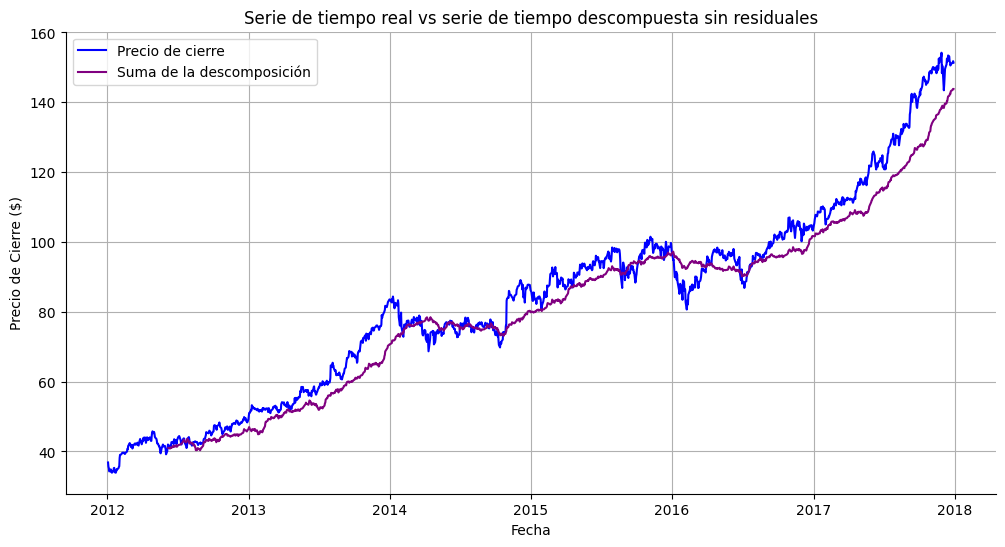

In [16]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['MA_Close'], label='Precio de cierre', color='blue')
plt.plot(descomposicion_ma.trend + descomposicion_ma.seasonal, label=f'Suma de la descomposición', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin residuales')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

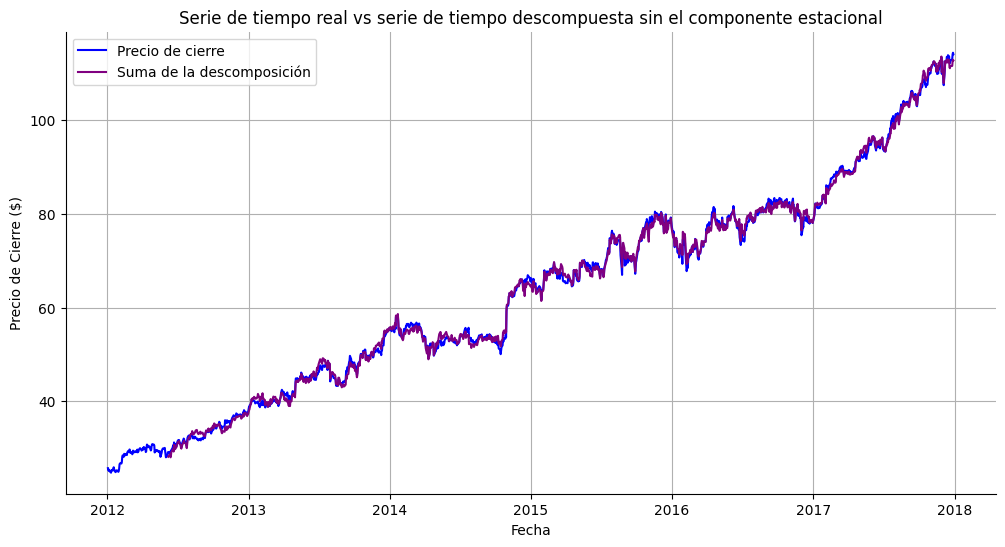

In [17]:
# Graficar descomposición
plt.figure(figsize=(12, 6)) # abre una nueva ventana gráfica
plt.plot(df['V_Close'], label='Precio de cierre', color='blue')
plt.plot(descomposicion_v.trend + descomposicion_v.resid, label=f'Suma de la descomposición', color='purple')
plt.title('Serie de tiempo real vs serie de tiempo descompuesta sin el componente estacional')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
plt.grid()
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

1. Tendencia:
La tendencia representa el cambio de largo plazo en los precios, suavizando las fluctuaciones diarias.

**VISA:**

La tendencia es más estable, con incrementos progresivos y sostenidos.
No se observan cambios abruptos en su pendiente.

**MasterCard:**

La tendencia también es ascendente, pero muestra ligeros cambios en su pendiente en ciertos períodos, lo que podría reflejar ajustes estratégicos o reacciones del mercado ante eventos específicos.

Ambas compañías muestran una tendencia positiva, lo que sugiere una percepción favorable del mercado hacia sus negocios. La estabilidad en VISA podría interpretarse como una acción más conservadora, mientras que los cambios en MasterCard podrían reflejar una mayor adaptabilidad a las condiciones del mercado.

2. Estacionalidad:
El componente estacional refleja ciclos repetitivos en ambas series. Los gráficos muestran:

* Incrementos recurrentes: Asociados con períodos de mayor actividad en el mercado, como reportes trimestrales o temporadas de alto consumo (por ejemplo, fin de año).

* Caídas recurrentes: Posiblemente vinculadas a períodos de menor actividad o ajustes después de los picos estacionales.

Los patrones estacionales son similares en ambas compañías, lo que refuerza la hipótesis de que comparten dinámicas comunes en el mercado. Estos ciclos podrían ser aprovechados para estrategias de inversión basadas en estacionalidad, identificando momentos óptimos para comprar o vender.

3. Residuales:
Los residuales son las fluctuaciones no explicadas por la tendencia ni la estacionalidad. Representan movimientos aleatorios o únicos, como:

* Impactos de noticias económicas.
* Cambios regulatorios.
* Eventos corporativos inesperados.

**VISA:**

Los residuales son de menor magnitud, lo que sugiere menor sensibilidad a eventos aleatorios.

**MasterCard:**

Se observan residuales más pronunciados, lo que indica una mayor exposición a factores impredecibles.

Los residuales más bajos en VISA sugieren que es una acción más estable y menos afectada por eventos únicos. En contraste, la mayor variabilidad en MasterCard podría asociarse con mayor volatilidad y oportunidades para especulación a corto plazo.



c) Investiga el concepto de "causalidad de Granger" y aplícalo a las series de tiempo

In [18]:
from statsmodels.tsa.stattools import grangercausalitytests

# Hipótesis Nula (H₀): La serie X no causa en el sentido de Granger a la serie Y.

# Hipótesis Alternativa (H₁): La serie X causa en el sentido de Granger a la serie Y.

# Definir el número máximo de rezagos para la prueba
max_lags = 5

# Realizar la prueba de causalidad de Granger
# La función devuelve resultados para varios tests y cada rezago hasta el máximo definido
resultado = grangercausalitytests(df[['V_Close', 'MA_Close']], max_lags, verbose=True)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.5760  , p=0.2095  , df_denom=1505, df_num=1
ssr based chi2 test:   chi2=1.5791  , p=0.2089  , df=1
likelihood ratio test: chi2=1.5783  , p=0.2090  , df=1
parameter F test:         F=1.5760  , p=0.2095  , df_denom=1505, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.3130  , p=0.2693  , df_denom=1502, df_num=2
ssr based chi2 test:   chi2=2.6348  , p=0.2678  , df=2
likelihood ratio test: chi2=2.6325  , p=0.2681  , df=2
parameter F test:         F=1.3130  , p=0.2693  , df_denom=1502, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.4170  , p=0.2361  , df_denom=1499, df_num=3
ssr based chi2 test:   chi2=4.2708  , p=0.2337  , df=3
likelihood ratio test: chi2=4.2647  , p=0.2343  , df=3
parameter F test:         F=1.4170  , p=0.2361  , df_denom=1499, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.0832  , p=0.

En el contexto de los precios de cierre de las acciones de VISA y MasterCard, la causalidad de Granger se utiliza para evaluar si una de estas acciones tiene un efecto predictivo sobre la otra. Esto ayuda a entender si los movimientos de una compañía podrían influir en los de la otra debido a dinámicas de mercado compartidas.

1. VISA causa a MasterCard:

Si los resultados indican que los valores pasados de los precios de VISA ayudan a predecir los de MasterCard:

VISA tiene un papel predictivo en la relación entre las dos acciones. Esto podría reflejar una influencia de las tendencias de VISA en el mercado sobre MasterCard, tal vez debido a una percepción compartida por los inversionistas.

2. MasterCard causa a VISA:

Si los valores pasados de los precios de MasterCard ayudan a predecir los de VISA:

 MasterCard podría ser la líder en términos de señalización de tendencias de mercado. Esto podría deberse a su comportamiento más dinámico o a eventos específicos que afectan a esta compañía y, por extensión, a VISA.

3. Relación Bidireccional:

Si ambas pruebas resultan significativas, existe una relación bidireccional:

Las acciones de VISA y MasterCard se afectan mutuamente. Esto puede ser un reflejo de la alta correlación en sus dinámicas de mercado, dada su posición similar en la industria financiera.

4. No hay Causalidad:

Si ninguna de las pruebas es significativa:

No hay evidencia suficiente para afirmar que una acción afecta predictivamente a la otra en el sentido de Granger. Esto podría sugerir que ambas responden a factores externos comunes, como condiciones macroeconómicas o tendencias globales.

* Influencia Predictiva:
La causalidad de Granger identifica si una de las acciones tiene una influencia predictiva significativa sobre la otra. Esto es relevante para estrategias de trading que buscan aprovechar relaciones entre activos.

* Similitud de Dinámicas:
Si existe causalidad bidireccional, las acciones de VISA y MasterCard podrían considerarse como altamente interconectadas, reflejando que responden a dinámicas compartidas del mercado financiero.

* Factores Externos:
Si no se detecta causalidad, la falta de influencia directa podría indicar que ambas series están gobernadas por factores externos comunes, como políticas monetarias o eventos globales.

* Aplicaciones Prácticas: En caso de una relación unidireccional, los valores de la serie causal pueden servir como indicadores líderes para estrategias de predicción y toma de decisiones.

Si no hay causalidad, podría ser necesario recurrir a otros enfoques analíticos para modelar el comportamiento conjunto de las series.

d) Investiga la aplicación del modelo "Prophet", sus alcances y limitaciones, y aplícalo a ambas series de tiempo.

In [19]:
!pip install prophet

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxy47w9xq/42x4rhxw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxy47w9xq/q9qovnre.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72777', 'data', 'file=/tmp/tmpxy47w9xq/42x4rhxw.json', 'init=/tmp/tmpxy47w9xq/q9qovnre.json', 'output', 'file=/tmp/tmpxy47w9xq/prophet_model_ji39i3r/prophet_model-20241123042357.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:23:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:23:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


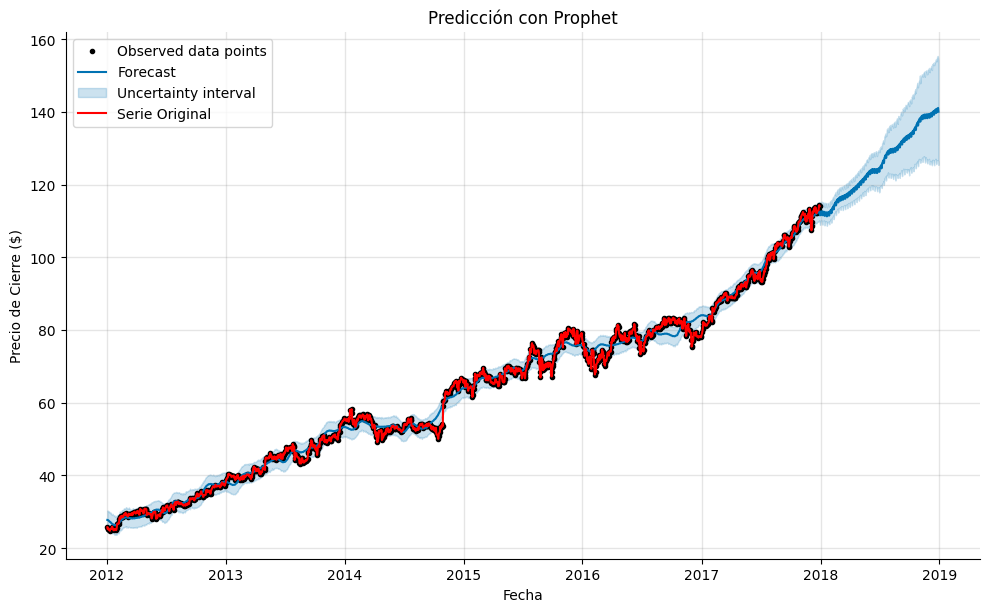

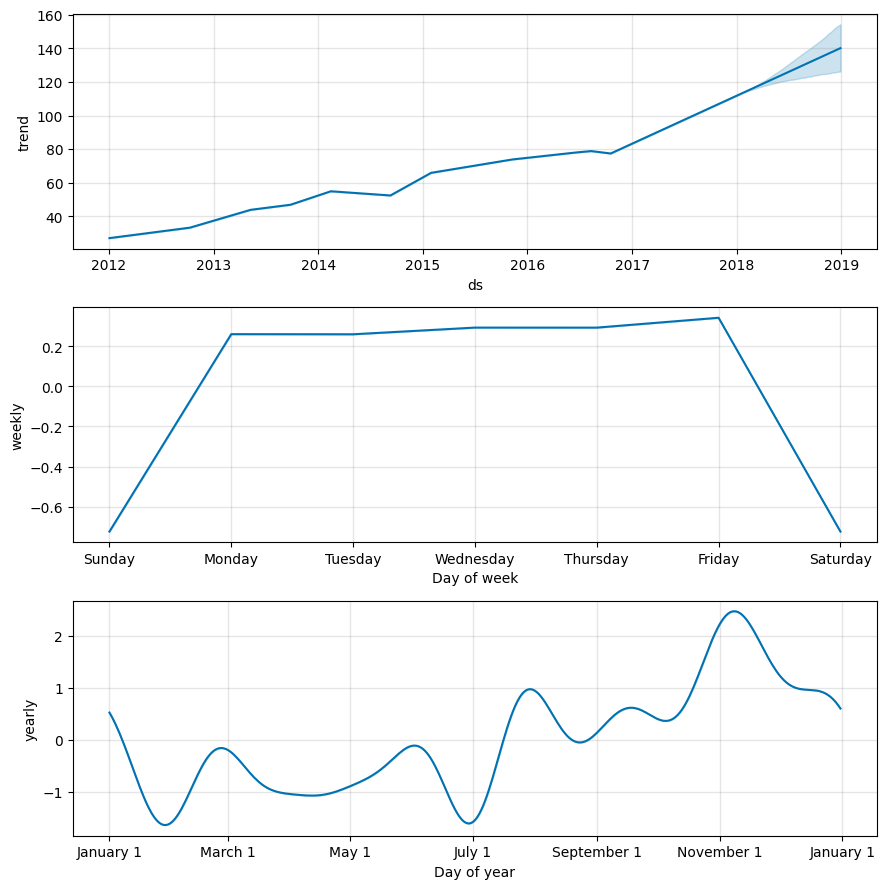

In [20]:
from prophet import Prophet

# Crear el modelo y ajustarlo
modelo = Prophet()
modelo.fit(df['V_Close'].reset_index().rename(columns={'Date': 'ds', 'V_Close': 'y'}))

# Predicción para los próximos 365 días
futuro = modelo.make_future_dataframe(periods=365)
predicciones = modelo.predict(futuro)

# Visualizar las predicciones
fig = modelo.plot(predicciones)
plt.plot(df['V_Close'], label='Serie Original', color='red')
plt.xlabel('Fecha')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Predicción con Prophet')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
fig = modelo.plot_components(predicciones)



INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxy47w9xq/5li17igs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxy47w9xq/2uwjkym3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81163', 'data', 'file=/tmp/tmpxy47w9xq/5li17igs.json', 'init=/tmp/tmpxy47w9xq/2uwjkym3.json', 'output', 'file=/tmp/tmpxy47w9xq/prophet_modelezdp9r13/prophet_model-20241123042402.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:24:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:24:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


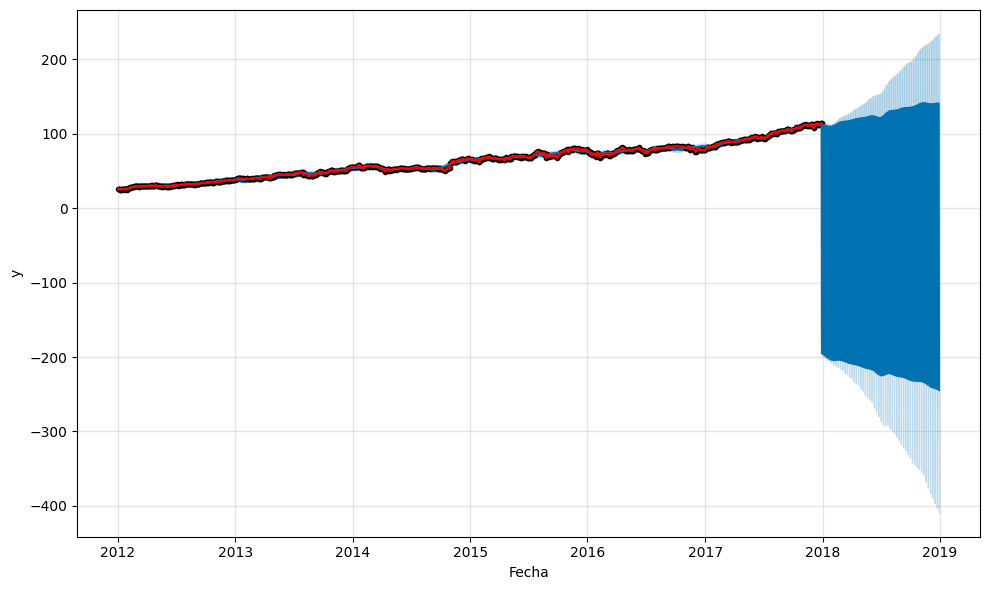

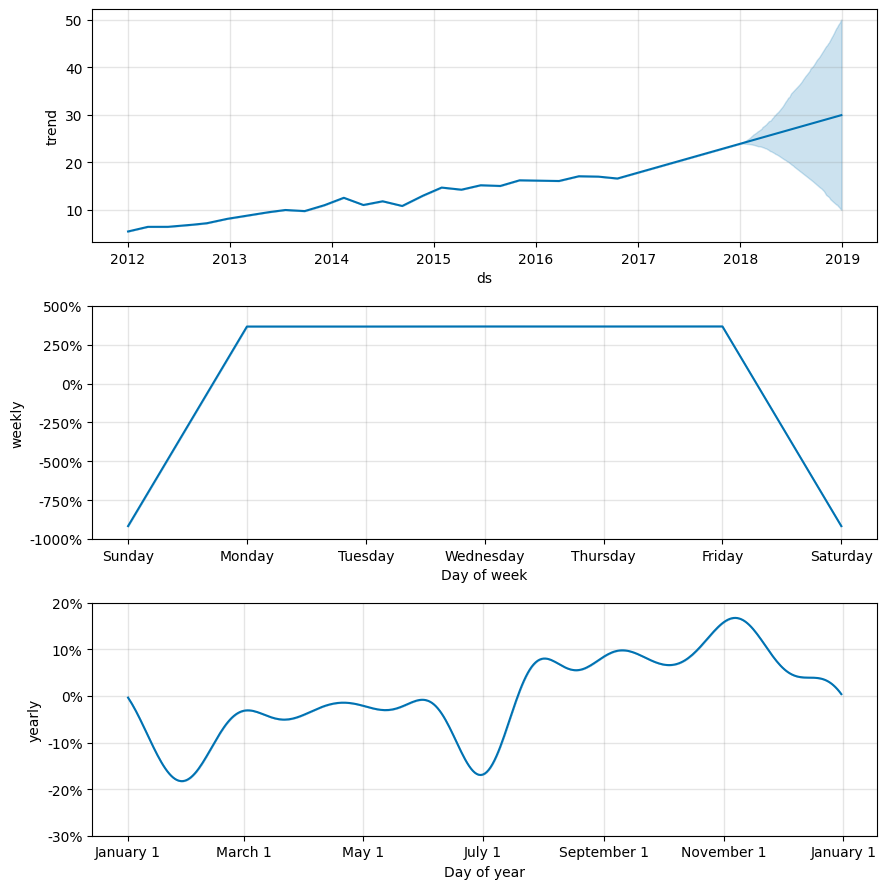

In [21]:
from prophet import Prophet

# Crear el modelo y ajustarlo
# Personalizando el modelo lo arruinamos :(
modelo = Prophet(
    changepoint_prior_scale=0.1,
    seasonality_mode='multiplicative',
    yearly_seasonality=10,
    weekly_seasonality=True,
    interval_width=0.95
)
modelo.fit(df['V_Close'].reset_index().rename(columns={'Date': 'ds', 'V_Close': 'y'}))

# Predicción para los próximos 365 días
futuro = modelo.make_future_dataframe(periods=365)
predicciones = modelo.predict(futuro)

# Visualizar las predicciones
fig = modelo.plot(predicciones)
plt.plot(df['V_Close'], label='Serie Original', color='red')
plt.xlabel('Fecha')
fig = modelo.plot_components(predicciones)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxy47w9xq/3zpxv28k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxy47w9xq/b1e3j_k8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32797', 'data', 'file=/tmp/tmpxy47w9xq/3zpxv28k.json', 'init=/tmp/tmpxy47w9xq/b1e3j_k8.json', 'output', 'file=/tmp/tmpxy47w9xq/prophet_model4uem3dm1/prophet_model-20241123042412.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:24:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:24:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


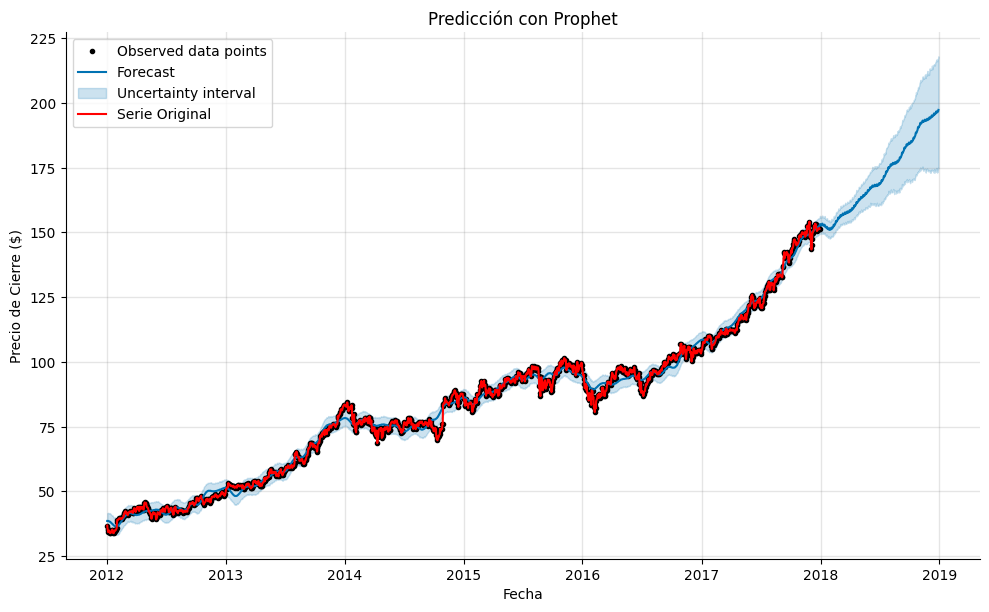

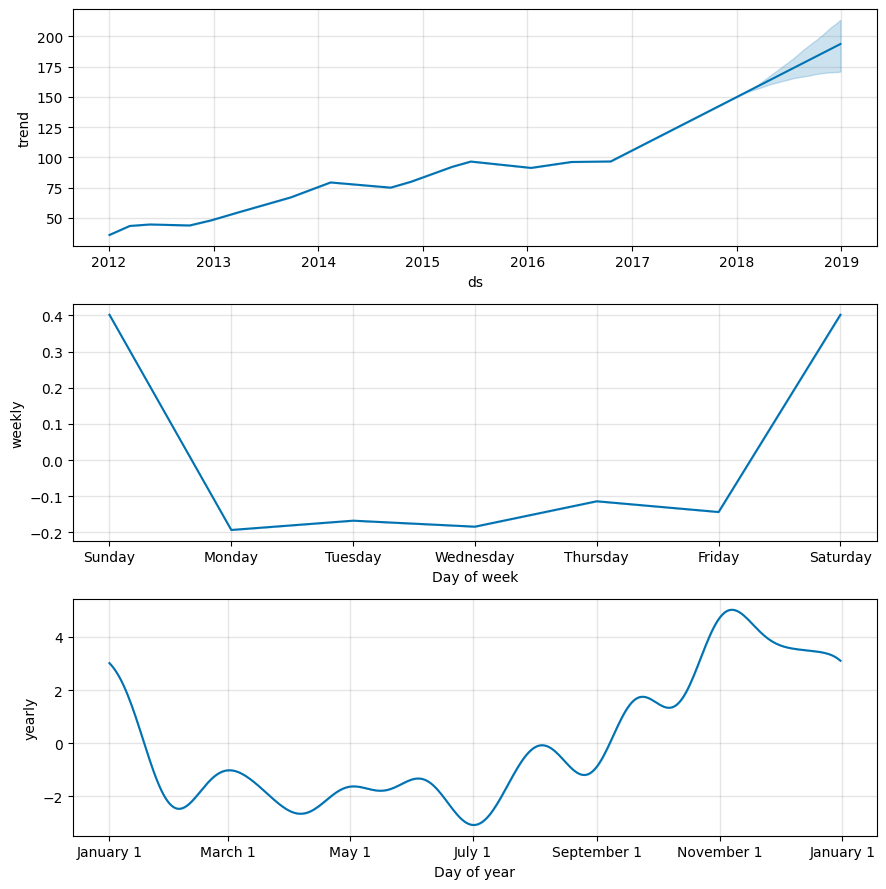

In [22]:
from prophet import Prophet

# Crear el modelo y ajustarlo
modelo = Prophet()
modelo.fit(df['MA_Close'].reset_index().rename(columns={'Date': 'ds', 'MA_Close': 'y'}))

# Predicción para los próximos 365 días
futuro = modelo.make_future_dataframe(periods=365)
predicciones = modelo.predict(futuro)

# Visualizar las predicciones
fig = modelo.plot(predicciones)
plt.plot(df['MA_Close'], label='Serie Original', color='red')
plt.xlabel('Fecha')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.title('Predicción con Prophet')
plt.ylabel('Precio de Cierre ($)')
plt.legend()
fig = modelo.plot_components(predicciones)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxy47w9xq/64aqky80.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxy47w9xq/upahlrkc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33683', 'data', 'file=/tmp/tmpxy47w9xq/64aqky80.json', 'init=/tmp/tmpxy47w9xq/upahlrkc.json', 'output', 'file=/tmp/tmpxy47w9xq/prophet_modely2digpy5/prophet_model-20241123042417.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:24:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:24:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


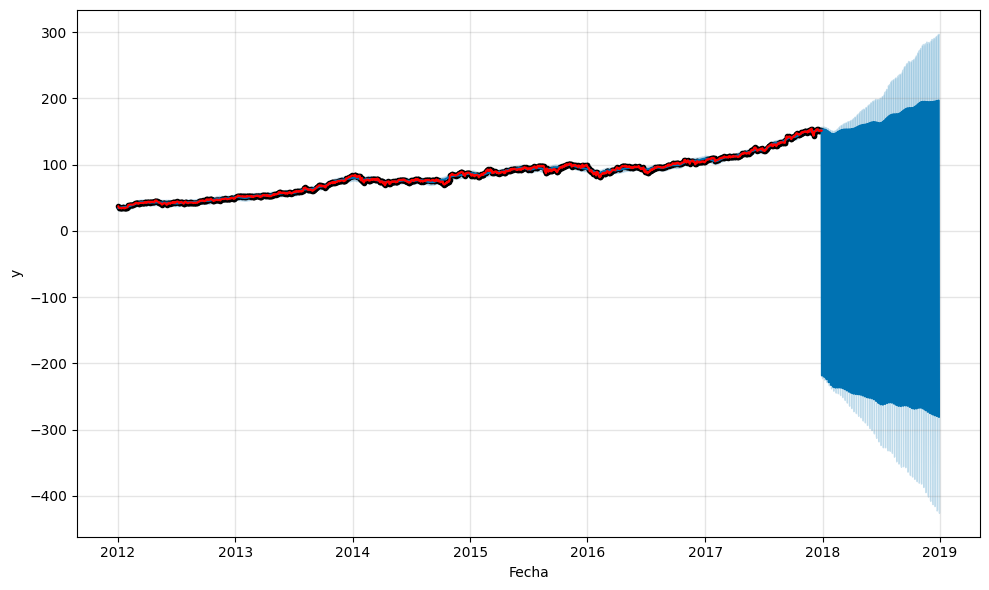

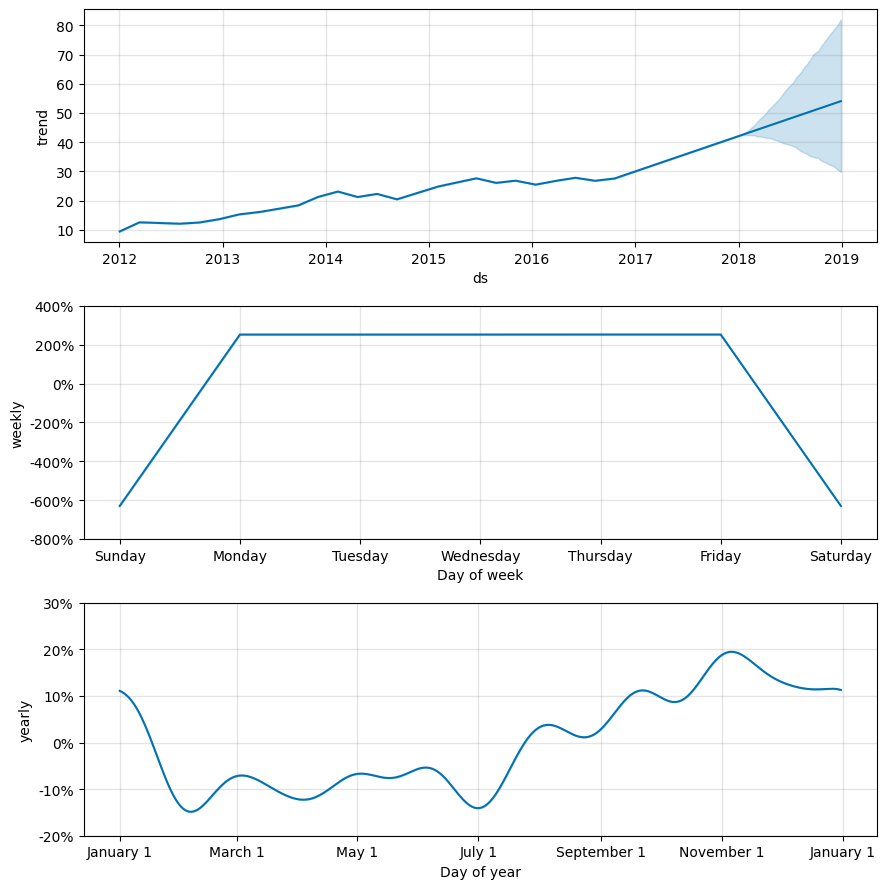

In [23]:
from prophet import Prophet

# Crear el modelo y ajustarlo
# Personalizando el modelo lo arruinamos :(
modelo = Prophet(
    changepoint_prior_scale=0.1,
    seasonality_mode='multiplicative',
    yearly_seasonality=10,
    weekly_seasonality=True,
    interval_width=0.95
)
modelo.fit(df['MA_Close'].reset_index().rename(columns={'Date': 'ds', 'MA_Close': 'y'}))

# Predicción para los próximos 365 días
futuro = modelo.make_future_dataframe(periods=365)
predicciones = modelo.predict(futuro)

# Visualizar las predicciones
fig = modelo.plot(predicciones)
plt.plot(df['MA_Close'], label='Serie Original', color='red')
plt.xlabel('Fecha')
fig = modelo.plot_components(predicciones)


1. Tendencia

**VISA:** Una tendencia al alza constante y estable, indicando un crecimiento progresivo y sostenido en el valor de sus acciones.

**MasterCard:** Una tendencia similar, pero con ligeras variaciones, lo que podría reflejar una mayor adaptabilidad o sensibilidad a eventos del mercado.

2. Estacionalidad

Ambas compañías presentan patrones recurrentes, probablemente relacionados con eventos de mercado, como reportes trimestrales o periodos de alta actividad (por ejemplo, fin de año).

MasterCard podría mostrar una estacionalidad más pronunciada, asociada a su dinámica más volátil.

3. Predicciones a Futuro

Si las predicciones de ambas compañías son positivas, refuerzan la hipótesis de crecimiento conjunto en la industria.

Los intervalos de confianza más estrechos en VISA sugieren mayor estabilidad, mientras que los de MasterCard podrían señalar oportunidades de inversión en momentos de alta volatilidad.

4. Aplicaciones Financieras

Las proyecciones pueden ser útiles para decidir estrategias de inversión a corto y mediano plazo.

La identificación de patrones estacionales permite anticipar momentos óptimos para comprar o vender acciones.

# CONCLUSIONES

El análisis de los precios históricos de VISA y MasterCard permitió identificar patrones clave sobre su relación, comportamiento temporal y predictibilidad. Ambas acciones muestran una correlación positiva alta, reflejando su conexión como líderes del sector financiero. Los resultados del test de causalidad de Granger evidenciaron una influencia bidireccional, sugiriendo que los precios de una pueden anticipar movimientos de la otra, aunque VISA se presenta como más estable frente a la mayor volatilidad de MasterCard.

La descomposición de las series temporales reveló tendencias crecientes y estacionalidades significativas en ambas acciones, aunque con mayor claridad en VISA. Por su parte, los residuales del modelo polinómico mostraron un buen ajuste en VISA, mientras que en MasterCard indicaron mayor dispersión y posibles problemas de modelado. El análisis de Fourier confirmó la existencia de ciclos recurrentes más marcados en MasterCard, mientras que el modelado con Prophet proyectó tendencias futuras con intervalos de confianza más ajustados para VISA, destacando su estabilidad y predecibilidad.

En conclusión, VISA demuestra un comportamiento más predecible y estable, ideal para estrategias de inversión conservadoras, mientras que MasterCard, con su mayor volatilidad e incertidumbre, podría ofrecer oportunidades de mayor riesgo-retorno. Estos hallazgos son clave para diseñar estrategias de inversión fundamentadas en datos históricos, modelado predictivo y análisis de relaciones entre activos.


La hipótesis inicial planteada sobre la relación entre los precios de las acciones de VISA y MasterCard buscaba determinar si existía una conexión significativa entre ambas y si dicha relación podría usarse para hacer predicciones fiables. A lo largo del análisis, se encontró que efectivamente hay una correlación alta entre los precios de ambas acciones y que la causalidad de Granger muestra una relación bidireccional. Esto indica que los movimientos de una acción pueden influir en la otra en ciertos contextos.

Sin embargo, aunque esta relación es significativa, la estabilidad y predictibilidad difieren entre ambas acciones. VISA mostró ser más estable y ajustarse mejor a los modelos predictivos, mientras que MasterCard presentó mayor volatilidad y dispersión en los residuales.

Conclusión sobre la hipótesis:

La hipótesis se cumple parcialmente. Existe una relación significativa entre VISA y MasterCard que puede ser aprovechada para análisis predictivos, pero el grado de precisión y confiabilidad de las predicciones varía entre ambas acciones. Esto sugiere que, aunque relacionadas, sus dinámicas internas presentan diferencias importantes que deben considerarse al modelarlas o utilizarlas para estrategias conjuntas.